## CatBoost 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Для начала необходимо выбрать оптимальное число итераций. Оно = 18.

Learning rate set to 0.5
0:	learn: 0.6122516	test: 0.6212022	best: 0.6212022 (0)	total: 159ms	remaining: 0us

bestTest = 0.6212021656
bestIteration = 0

Learning rate set to 0.482629
0:	learn: 0.6143425	test: 0.6229656	best: 0.6229656 (0)	total: 5.18ms	remaining: 5.18ms
1:	learn: 0.5782678	test: 0.5964949	best: 0.5964949 (1)	total: 10.3ms	remaining: 0us

bestTest = 0.5964948814
bestIteration = 1

Learning rate set to 0.404589
0:	learn: 0.6243559	test: 0.6315218	best: 0.6315218 (0)	total: 5ms	remaining: 10ms
1:	learn: 0.5890950	test: 0.6043552	best: 0.6043552 (1)	total: 9.79ms	remaining: 4.89ms
2:	learn: 0.5673477	test: 0.5924898	best: 0.5924898 (2)	total: 14.5ms	remaining: 0us

bestTest = 0.5924897694
bestIteration = 2

Learning rate set to 0.356998
0:	learn: 0.6309666	test: 0.6372556	best: 0.6372556 (0)	total: 6.32ms	remaining: 19ms
1:	learn: 0.5968497	test: 0.6102982	best: 0.6102982 (1)	total: 12.4ms	remaining: 12.4ms
2:	learn: 0.5747820	test: 0.5972820	best: 0.5972820 (2)	total: 17.

Learning rate set to 0.207012
0:	learn: 0.6543555	test: 0.6579392	best: 0.6579392 (0)	total: 6.58ms	remaining: 85.5ms
1:	learn: 0.6303524	test: 0.6386475	best: 0.6386475 (1)	total: 12.9ms	remaining: 77.6ms
2:	learn: 0.6070589	test: 0.6208091	best: 0.6208091 (2)	total: 19.1ms	remaining: 70.1ms
3:	learn: 0.5927398	test: 0.6095147	best: 0.6095147 (3)	total: 24.6ms	remaining: 61.4ms
4:	learn: 0.5806411	test: 0.6005474	best: 0.6005474 (4)	total: 30.3ms	remaining: 54.6ms
5:	learn: 0.5717936	test: 0.5927003	best: 0.5927003 (5)	total: 36ms	remaining: 48ms
6:	learn: 0.5661039	test: 0.5887302	best: 0.5887302 (6)	total: 41.9ms	remaining: 41.9ms
7:	learn: 0.5597878	test: 0.5835154	best: 0.5835154 (7)	total: 47.3ms	remaining: 35.5ms
8:	learn: 0.5528187	test: 0.5784120	best: 0.5784120 (8)	total: 52.4ms	remaining: 29.1ms
9:	learn: 0.5476967	test: 0.5776810	best: 0.5776810 (9)	total: 57.4ms	remaining: 22.9ms
10:	learn: 0.5436571	test: 0.5739957	best: 0.5739957 (10)	total: 62.2ms	remaining: 17ms
11:	le

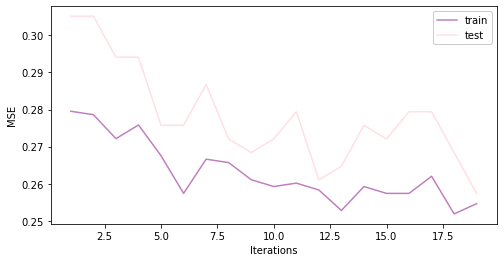

In [3]:
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
def catboost_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test))
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='purple', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='pink', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("Iterations")
    ax.legend(framealpha=1, frameon=True);
catboost_best_n_estimator(X_train, X_test, y_train, y_test, list(range(1,20)))

Выбор глубины. У нас оптимальной является 6.

Learning rate set to 0.185574
0:	learn: 0.6728996	test: 0.6736379	best: 0.6736379 (0)	total: 706us	remaining: 12ms
1:	learn: 0.6588713	test: 0.6599966	best: 0.6599966 (1)	total: 1.32ms	remaining: 10.6ms
2:	learn: 0.6495225	test: 0.6516934	best: 0.6516934 (2)	total: 2.4ms	remaining: 12ms
3:	learn: 0.6396942	test: 0.6419526	best: 0.6419526 (3)	total: 3.42ms	remaining: 12ms
4:	learn: 0.6308429	test: 0.6352906	best: 0.6352906 (4)	total: 4.11ms	remaining: 10.7ms
5:	learn: 0.6240070	test: 0.6315581	best: 0.6315581 (5)	total: 4.98ms	remaining: 9.95ms
6:	learn: 0.6159542	test: 0.6223717	best: 0.6223717 (6)	total: 5.66ms	remaining: 8.89ms
7:	learn: 0.6095263	test: 0.6134155	best: 0.6134155 (7)	total: 6.27ms	remaining: 7.84ms
8:	learn: 0.6062140	test: 0.6107751	best: 0.6107751 (8)	total: 6.9ms	remaining: 6.9ms
9:	learn: 0.6002641	test: 0.6028903	best: 0.6028903 (9)	total: 7.53ms	remaining: 6.02ms
10:	learn: 0.5956205	test: 0.5971545	best: 0.5971545 (10)	total: 8.2ms	remaining: 5.22ms
11:	learn: 

0:	learn: 0.6580198	test: 0.6612242	best: 0.6612242 (0)	total: 5.53ms	remaining: 94ms
1:	learn: 0.6360444	test: 0.6429373	best: 0.6429373 (1)	total: 11ms	remaining: 87.7ms
2:	learn: 0.6136884	test: 0.6255807	best: 0.6255807 (2)	total: 16ms	remaining: 79.8ms
3:	learn: 0.5986555	test: 0.6137145	best: 0.6137145 (3)	total: 21ms	remaining: 73.5ms
4:	learn: 0.5865296	test: 0.6044495	best: 0.6044495 (4)	total: 26.5ms	remaining: 68.8ms
5:	learn: 0.5778021	test: 0.5963898	best: 0.5963898 (5)	total: 33ms	remaining: 66ms
6:	learn: 0.5699629	test: 0.5909523	best: 0.5909523 (6)	total: 39ms	remaining: 61.3ms
7:	learn: 0.5624891	test: 0.5847800	best: 0.5847800 (7)	total: 50.4ms	remaining: 63ms
8:	learn: 0.5552792	test: 0.5810765	best: 0.5810765 (8)	total: 56.7ms	remaining: 56.7ms
9:	learn: 0.5494668	test: 0.5796948	best: 0.5796948 (9)	total: 61.5ms	remaining: 49.2ms
10:	learn: 0.5452985	test: 0.5758382	best: 0.5758382 (10)	total: 72.4ms	remaining: 46.1ms
11:	learn: 0.5419080	test: 0.5737778	best: 0.5

0:	learn: 0.6613210	test: 0.6652138	best: 0.6652138 (0)	total: 81.3ms	remaining: 1.38s
1:	learn: 0.6360883	test: 0.6494435	best: 0.6494435 (1)	total: 161ms	remaining: 1.29s
2:	learn: 0.6168920	test: 0.6339725	best: 0.6339725 (2)	total: 224ms	remaining: 1.12s
3:	learn: 0.5993941	test: 0.6201571	best: 0.6201571 (3)	total: 275ms	remaining: 964ms
4:	learn: 0.5860102	test: 0.6109738	best: 0.6109738 (4)	total: 320ms	remaining: 832ms
5:	learn: 0.5723716	test: 0.6056357	best: 0.6056357 (5)	total: 363ms	remaining: 726ms
6:	learn: 0.5627479	test: 0.5998713	best: 0.5998713 (6)	total: 404ms	remaining: 635ms
7:	learn: 0.5518447	test: 0.5937435	best: 0.5937435 (7)	total: 446ms	remaining: 557ms
8:	learn: 0.5427534	test: 0.5865031	best: 0.5865031 (8)	total: 493ms	remaining: 493ms
9:	learn: 0.5361653	test: 0.5819449	best: 0.5819449 (9)	total: 536ms	remaining: 429ms
10:	learn: 0.5300188	test: 0.5790179	best: 0.5790179 (10)	total: 582ms	remaining: 371ms
11:	learn: 0.5250644	test: 0.5762141	best: 0.576214

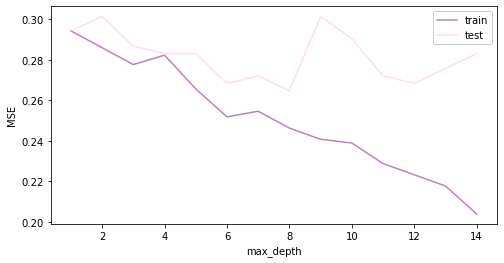

In [4]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=18,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test))
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='purple', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='pink', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

Наконец-то строим модель. По качеству CatBoost превосходит все рассмотренные методы.

In [5]:
cb = CatBoostClassifier(iterations=18,max_depth=6,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test))

y_pred = cb.predict(X_test)
cb.score(X_test,y_test)

Learning rate set to 0.185574
0:	learn: 0.6580198	test: 0.6612242	best: 0.6612242 (0)	total: 3.27ms	remaining: 55.6ms
1:	learn: 0.6360444	test: 0.6429373	best: 0.6429373 (1)	total: 6.15ms	remaining: 49.2ms
2:	learn: 0.6136884	test: 0.6255807	best: 0.6255807 (2)	total: 9.7ms	remaining: 48.5ms
3:	learn: 0.5986555	test: 0.6137145	best: 0.6137145 (3)	total: 12.9ms	remaining: 45.1ms
4:	learn: 0.5865296	test: 0.6044495	best: 0.6044495 (4)	total: 15.7ms	remaining: 40.8ms
5:	learn: 0.5778021	test: 0.5963898	best: 0.5963898 (5)	total: 18.6ms	remaining: 37.2ms
6:	learn: 0.5699629	test: 0.5909523	best: 0.5909523 (6)	total: 21.7ms	remaining: 34ms
7:	learn: 0.5624891	test: 0.5847800	best: 0.5847800 (7)	total: 24.9ms	remaining: 31.1ms
8:	learn: 0.5552792	test: 0.5810765	best: 0.5810765 (8)	total: 28ms	remaining: 28ms
9:	learn: 0.5494668	test: 0.5796948	best: 0.5796948 (9)	total: 30.8ms	remaining: 24.7ms
10:	learn: 0.5452985	test: 0.5758382	best: 0.5758382 (10)	total: 33.8ms	remaining: 21.5ms
11:	lea

0.7316176470588235

Посмотрим на матрицу сопряженности. Видим, что модель 199 объектов распознала верно и 73 нет. Точность модели: 73,1%. Доля ошибок: 26,9%.

In [6]:
from sklearn.metrics import confusion_matrix
cb = confusion_matrix(y_test, y_pred)
print(cb)

[[103  43]
 [ 30  96]]


## Вывод по классификаторам: сравнивая все модели, можем смело сказать, что имеем 2 лидера - метод k-ближайших соседей и CatBoost, у которых точность достигает почти 71% и 73%. Они имеют почти аналогичные матрицы сопряжённости. По сложности реализации (лично для меня) метод k-ближайших соседей проще, поэтому я отдаю предпочтение именно ему.  101 университет классификатор отнёс к заведениям с высоким уровнем дохода, а 93 - с низким. Стоит отметить, что другие рассмотренные модели тоже были достаточно качественными (точность около 66%). Напомню, что для классификации были использованы такие переменные, как количество студентов на 1 сотрудника, % женщин и уровень преподавания.